In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# UDL

PSNR, Error, Uncertainty

PearsonRResult(statistic=-0.8515727806195018, pvalue=0.0)
PearsonRResult(statistic=-0.8370958545865189, pvalue=0.0)
PearsonRResult(statistic=-0.8136935398635975, pvalue=0.0)
PearsonRResult(statistic=-0.7736207476481389, pvalue=0.0)


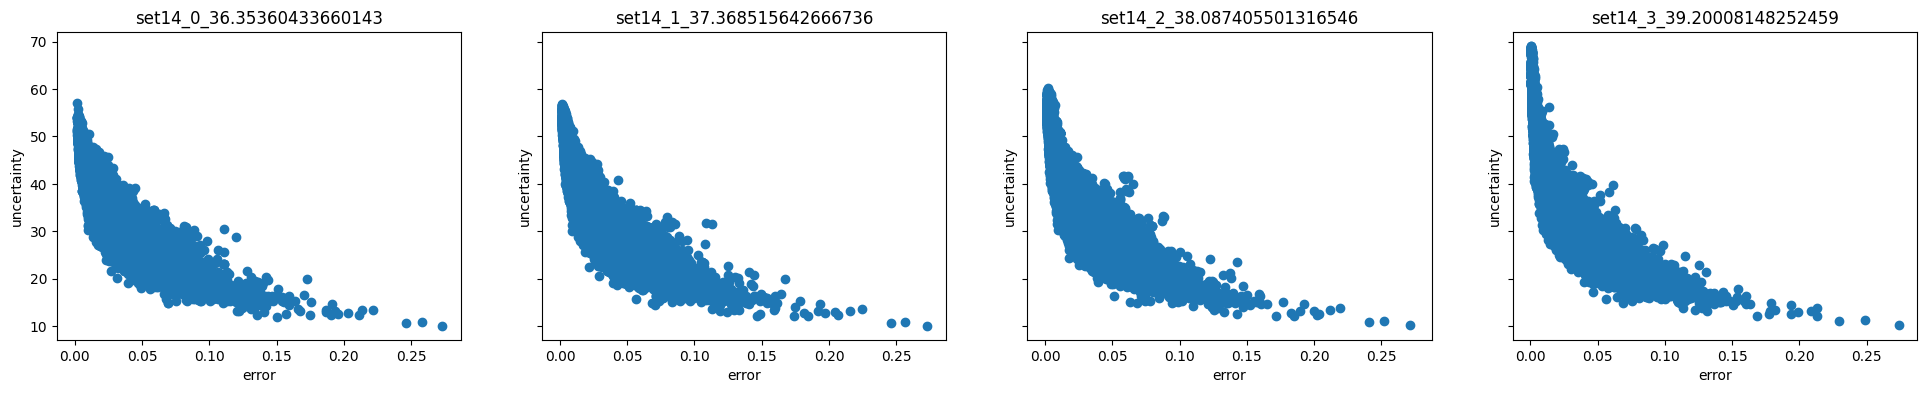

In [30]:
set14_fn = '/mnt/disk1/nmduong/FusionNet/fusion-net/ANALYZE/SUPERNET_UDL/SuperNet_udlnblock-1_lbda0.0_gamma0.2_den1.0/Set14B/psn_unc_Set14B.npy'
set14_map = np.load(set14_fn) 

# 0, 2, 4, 6

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(24, 4), sharey=True, sharex=True)

# plt.scatter(x=set5_flatten[:, 1], y=set5_flatten[:, 2])

for i in range(4):
    id_ = i*3
    x = set14_map[:, id_+1]
    y = set14_map[:, id_+0]
    axs[i].scatter(x=x, y=y)
    print(stats.pearsonr(x, y))
    
    axs[i].set_xlabel('error')
    axs[i].set_ylabel('uncertainty')
    axs[i].set_title(f'set14_{i}_{set14_map[:, id_].mean()}')
    
plt.show()

In [5]:
def visualize(block_id):

    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(24, 4), sharey=True)

    id_=3*block_id
    error = set14_map[:, id_+1]
    unc = set14_map[:, id_+2]
    perc = 75

    # unc mask
    unc_top25 = (unc > np.percentile(unc, perc)).astype(bool) 
    unc_indexes = list(zip(*np.where(unc_top25)))
    unc_indexes = [i[0] for i in unc_indexes]
    unc_not_indexes = [i for i in range(set14_map.shape[0]) if i not in unc_indexes]


    # err mask
    err_top25 = (error > np.percentile(error, perc)).astype(bool)
    err_indexes = list(zip(*np.where(err_top25)))
    err_indexes = [i[0] for i in err_indexes]
    err_not_indexes = [i for i in range(set14_map.shape[0]) if i not in err_indexes]


    indexes = list(set(set(err_indexes) & set(unc_indexes)))
    print(f'block {block_id}: ', len(indexes) / len(unc_indexes))
    not_indexes = [i for i in range(set14_map.shape[0]) if i not in indexes]

    for i in range(4):
        id_=i*3
        err = set14_map[:, id_+1]
        unc = set14_map[:, id_+2]
        
        axs[i].scatter(x=err[not_indexes], y=unc[not_indexes], c='blue')
        axs[i].scatter(x=err[indexes], y=unc[indexes], c='orange')
        
        axs[i].set_xlabel('error')
        axs[i].set_ylabel('uncertainty')
        axs[i].set_title(f'set14_{i}_{set14_map[:, id_].mean()}')
    

block 0:  0.776496958053154
block 1:  0.7905859750240154
block 2:  0.7937880243355747
block 3:  0.8053154018571886


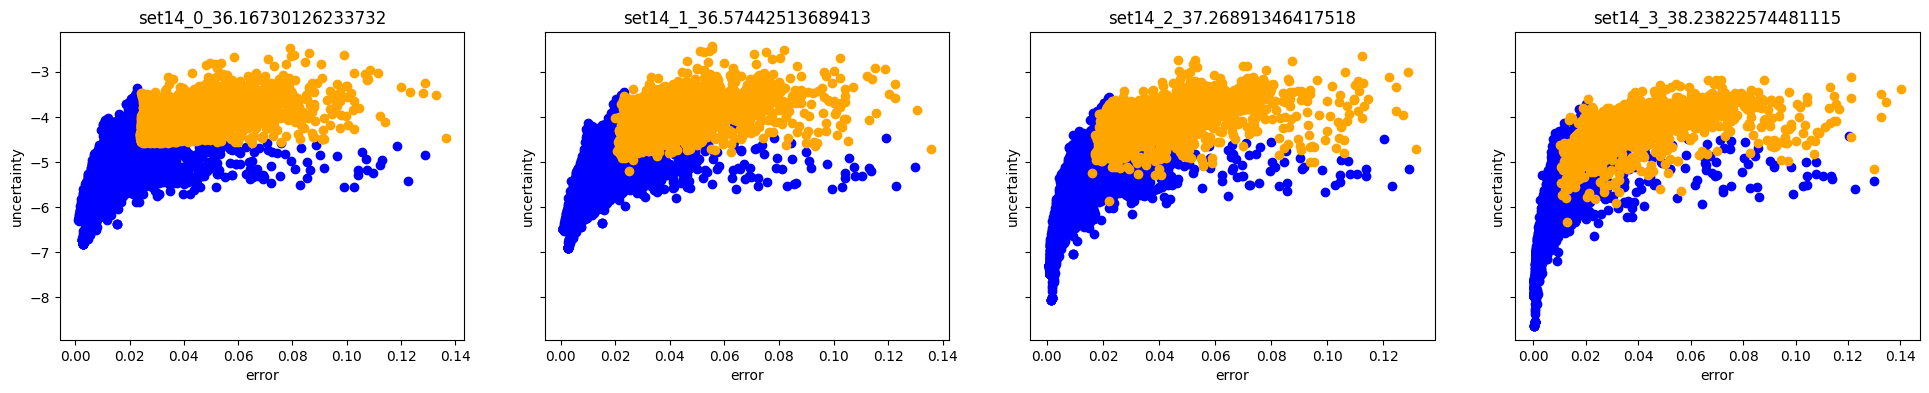

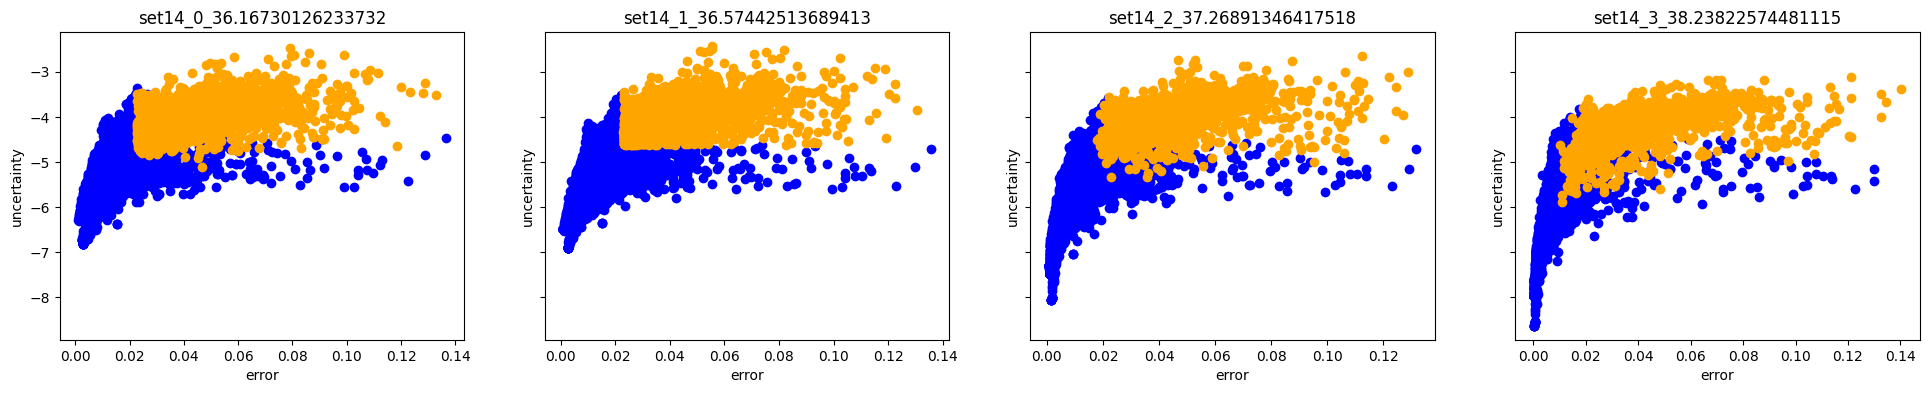

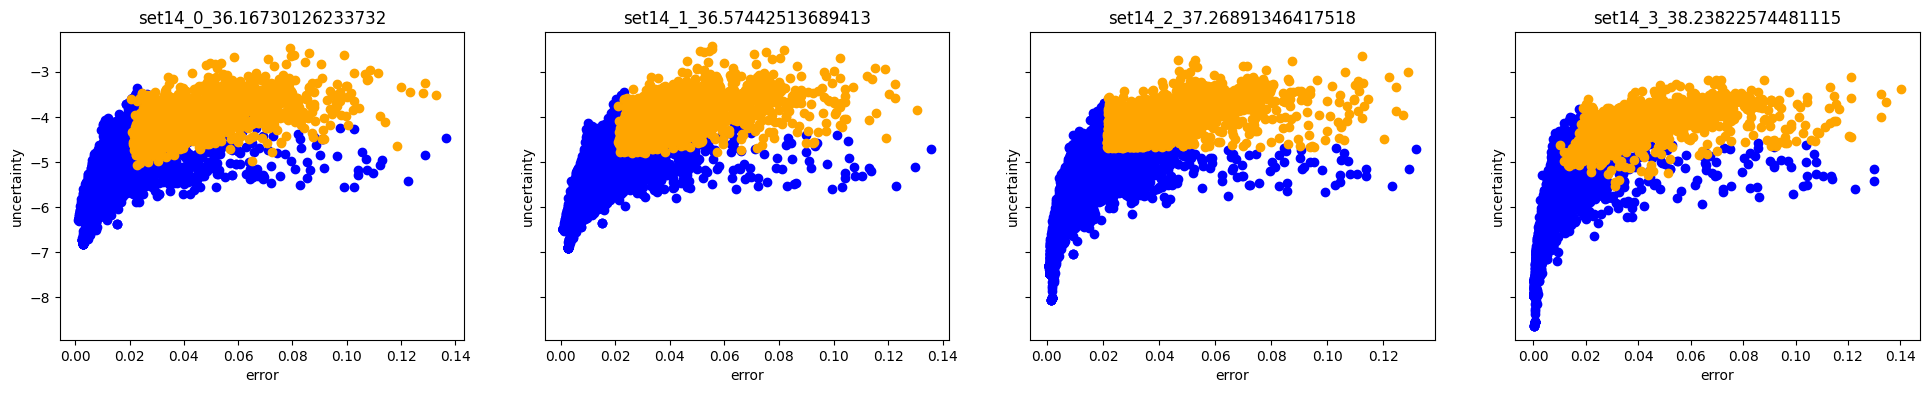

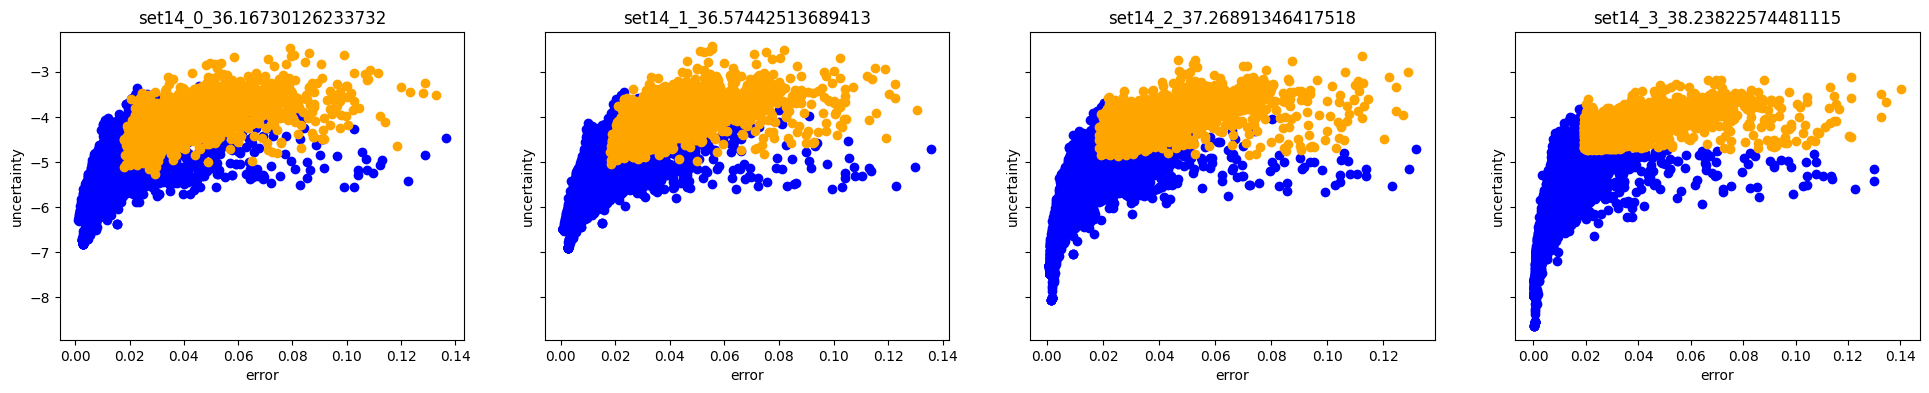

In [6]:
for i in range(4):
    visualize(i)

# SEP

PearsonRResult(statistic=-0.8333185348933969, pvalue=0.0)
PearsonRResult(statistic=-0.8215654249249849, pvalue=0.0)
PearsonRResult(statistic=-0.8201439152668288, pvalue=0.0)
PearsonRResult(statistic=-0.792944097499621, pvalue=0.0)


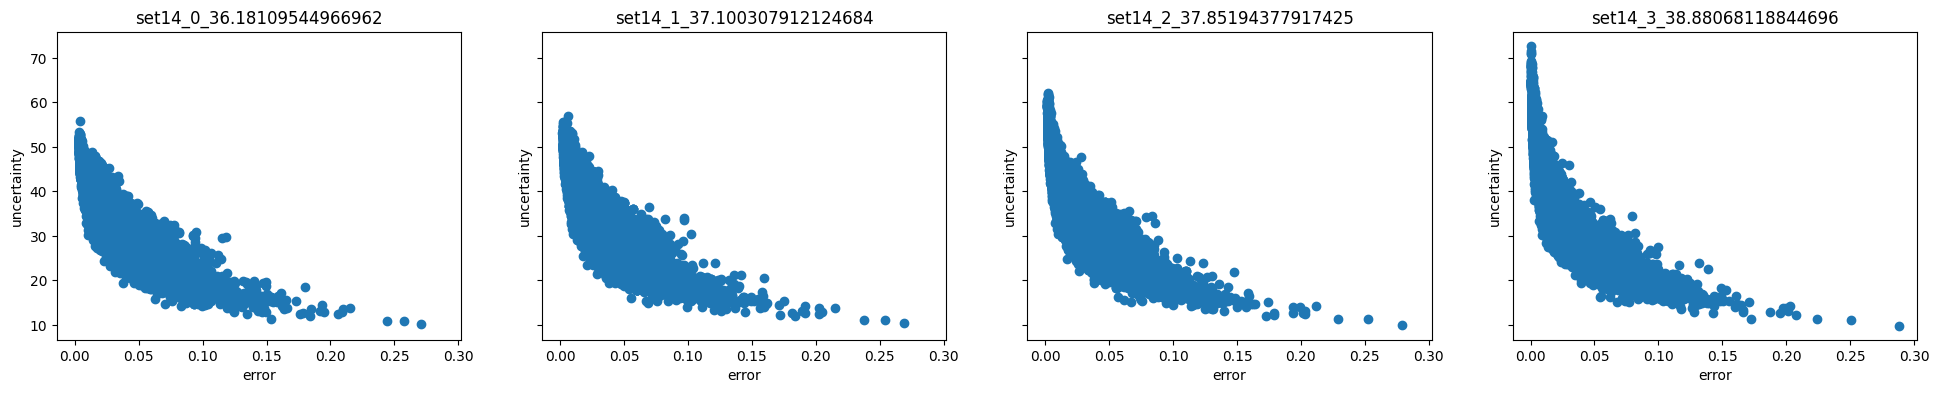

In [31]:
set14_fn = '/mnt/disk1/nmduong/FusionNet/fusion-net/ANALYZE/SUPERNET_SEP/SuperNet_separatenblock-1_lbda0.0_gamma0.2_den1.0/Set14B/psn_unc_Set14B.npy'
set14_map = np.load(set14_fn) 

# 0, 2, 4, 6

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(24, 4), sharey=True, sharex=True)

# plt.scatter(x=set5_flatten[:, 1], y=set5_flatten[:, 2])

for i in range(4):
    id_ = i*3
    x = set14_map[:, id_+1]
    y = set14_map[:, id_+0]
    axs[i].scatter(x=x, y=y)
    print(stats.pearsonr(x, y))
    
    axs[i].set_xlabel('error')
    axs[i].set_ylabel('uncertainty')
    axs[i].set_title(f'set14_{i}_{set14_map[:, id_].mean()}')
    
plt.show()

block 0:  0.7992315081652257
block 1:  0.7848222862632085
block 2:  0.7796990073647134
block 3:  0.7825808517451168


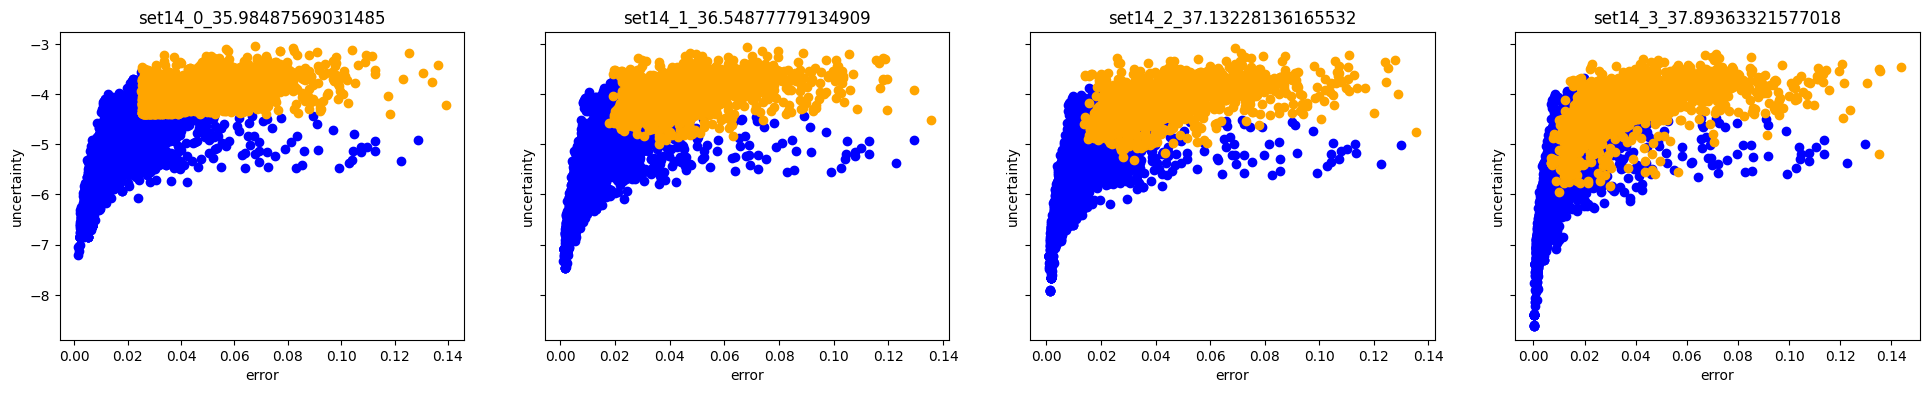

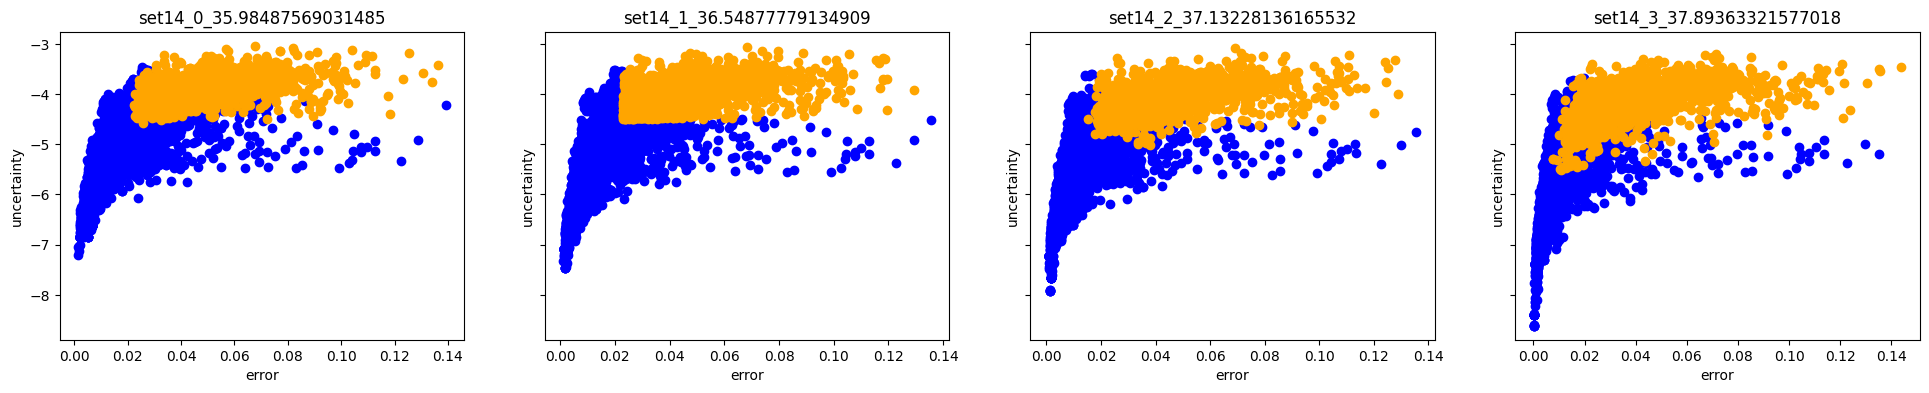

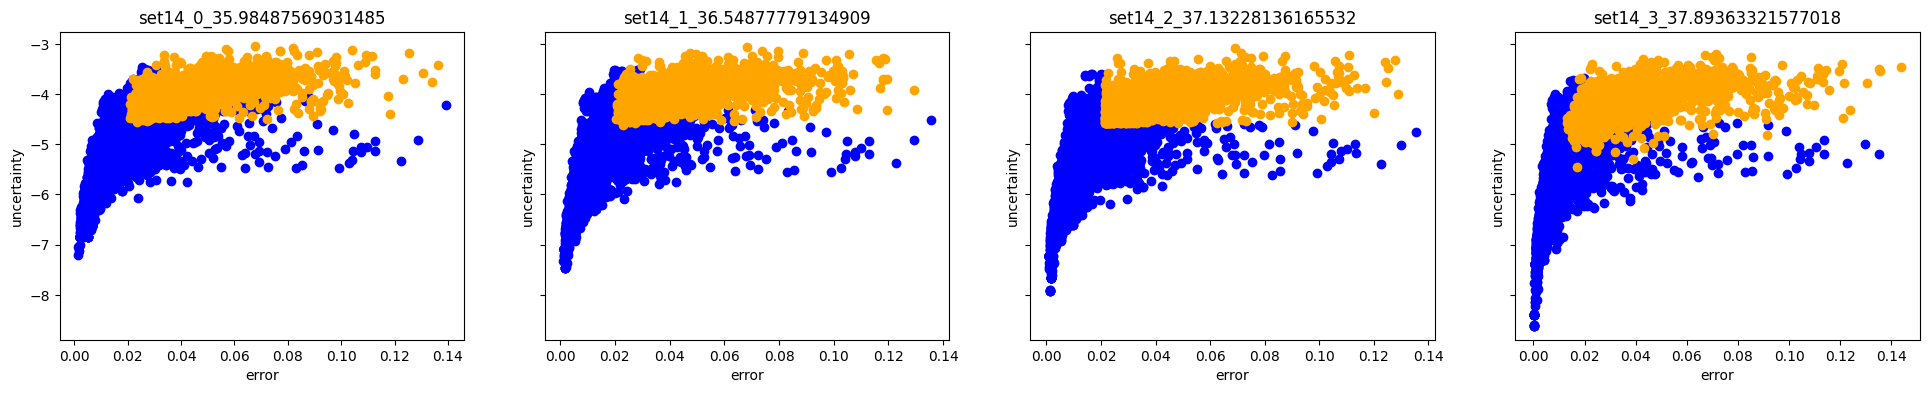

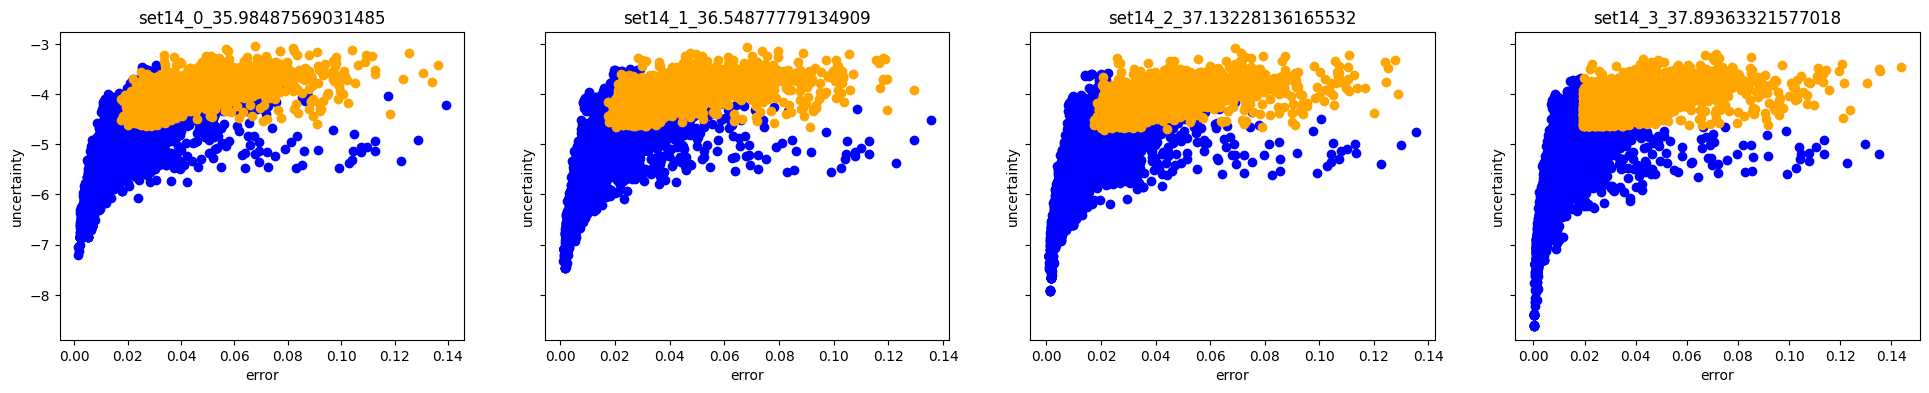

In [9]:
for i in range(4):
    visualize(i)

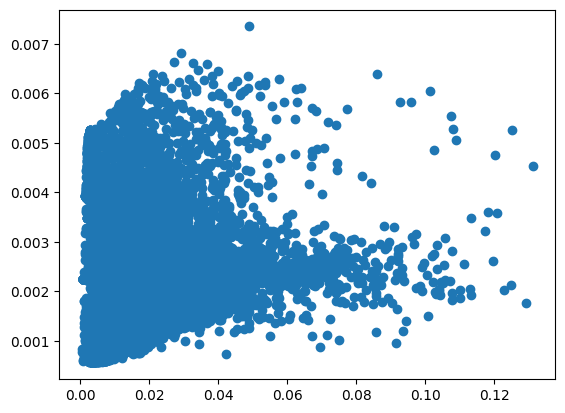

In [ ]:
# plt.scatter(x=set5_flatten[:, 1], y=set5_flatten[:, 2])
plt.scatter(x=set14_map[:, 1], y=set14_map[:, 2])
plt.show()